In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_excel('../../data/economic_burden/Ministry of Health Budget 2007 To 2025.xlsx')
df.columns = df.columns.str.strip()
if df.index.name == 'Gregorian_year':
    df = df.reset_index()
# Drop empty rows
df = df.dropna(subset=['Gregorian_year', 'Total_budget'])
cols_to_numeric = ['Total_budget', 'Total_state_budget', 'Gregorian_year']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.tail(5)

,Hijri_year,Gregorian_year,Total_state_budget,Total_budget,Percentage,Workers_Compensation,Goods_and_Services,Expenditures_on_programs,Expenditures_on_projects,Unnamed: 9,Unnamed: 10
14,​​​1443/1442​,2021.0,99000000.0,79846364.0,0.0782,52179339.0,22572500.0,4160000.0,934525.0,NaN,NaN
15,1444/1443​,2022.0,95500000.0,77696297.0,0.0800,56566900.0,16528358.0,3488730.0,1112306.0,NaN,NaN
16,​1445/1444,2023.0,111400000.0,80751614.0,0.0700,61303065.0,14933528.0,1228824.0,3286193.0,NaN,NaN
17,1446/1445,2024.0,125100000.0,86253063.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,1447/1446,2025.0,128500000.0,99279673.0,8.0000,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Hijri_year                19 non-null     object 
 1   Gregorian_year            19 non-null     float64
 2   Total_state_budget        19 non-null     float64
 3   Total_budget              19 non-null     float64
 4   Percentage                18 non-null     float64
 5   Workers_Compensation      17 non-null     float64
 6   Goods_and_Services        17 non-null     float64
 7   Expenditures_on_programs  17 non-null     float64
 8   Expenditures_on_projects  17 non-null     float64
 9   Unnamed: 9                0 non-null      float64
 10  Unnamed: 10               0 non-null      float64
dtypes: float64(10), object(1)
memory usage: 1.8+ KB


In [4]:
expenditure_cols = [
    'Workers_Compensation', 
    'Goods_and_Services', 
    'Expenditures_on_programs', 
    'Expenditures_on_projects'
]

df['Calculated_Expenditures'] = df[expenditure_cols].sum(axis=1)

print("First 5 rows with total expenses calculated:")
print(df[['Gregorian_year','Total_budget', 'Calculated_Expenditures']].head())

First 5 rows with total expenses calculated:
   Gregorian_year  Total_budget  Calculated_Expenditures
0          2007.0    22808200.0               22808200.0
1          2008.0    25220000.0               25220000.0
2          2009.0    29518700.0               29518700.0
3          2010.0    35063200.0               35063200.0
4          2011.0    39860200.0               39860200.0


In [5]:
df['Variance'] = df['Total_budget'] - df['Calculated_Expenditures']

inconsistent_years = df[df['Variance'] != 0]

if inconsistent_years.empty:
    print("\n✅The data is perfectly consistent. Total expenditure equals the total budget for all years.")
else:
    print("\n⚠️ Warning: Variances were found in the following years:")
    print(inconsistent_years[['Gregorian_year', 'Total_budget', 'Calculated_Expenditures', 'Variance']])


⚠️ Warning: Variances were found in the following years:
    Gregorian_year  Total_budget  Calculated_Expenditures    Variance
10          2017.0    67757893.0               67758793.0      -900.0
12          2019.0    75403859.0               68227572.0   7176287.0
15          2022.0    77696297.0               77696294.0         3.0
16          2023.0    80751614.0               80751610.0         4.0
17          2024.0    86253063.0                      0.0  86253063.0
18          2025.0    99279673.0                      0.0  99279673.0


In [6]:
print("\n--- Descriptive statistics of budget and expenditures---")
print(df[['Total_state_budget', 'Total_budget', 'Calculated_Expenditures']].describe())
df.tail(5)


--- Descriptive statistics of budget and expenditures---
       Total_state_budget  Total_budget  Calculated_Expenditures
count        1.900000e+01  1.900000e+01             1.900000e+01
mean         8.462632e+07  6.009597e+07             4.995343e+07
std          2.666408e+07  2.195726e+07             2.534093e+07
min          3.800000e+07  2.280820e+07             0.000000e+00
25%          6.350000e+07  4.346832e+07             3.229095e+07
50%          8.600000e+07  6.234254e+07             5.889919e+07
75%          1.005000e+08  7.655472e+07             6.799318e+07
max          1.285000e+08  9.927967e+07             8.075161e+07


,Hijri_year,Gregorian_year,Total_state_budget,Total_budget,Percentage,Workers_Compensation,Goods_and_Services,Expenditures_on_programs,Expenditures_on_projects,Unnamed: 9,Unnamed: 10,Calculated_Expenditures,Variance
14,​​​1443/1442​,2021.0,99000000.0,79846364.0,0.0782,52179339.0,22572500.0,4160000.0,934525.0,NaN,NaN,79846364.0,0.0
15,1444/1443​,2022.0,95500000.0,77696297.0,0.0800,56566900.0,16528358.0,3488730.0,1112306.0,NaN,NaN,77696294.0,3.0
16,​1445/1444,2023.0,111400000.0,80751614.0,0.0700,61303065.0,14933528.0,1228824.0,3286193.0,NaN,NaN,80751610.0,4.0
17,1446/1445,2024.0,125100000.0,86253063.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,86253063.0
18,1447/1446,2025.0,128500000.0,99279673.0,8.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,99279673.0


In [7]:
df['YoY_Change_Budget'] = df['Total_budget'].pct_change() * 100

print("\n--- Annual change in budget (%) ---")
print(df[['Gregorian_year', 'Total_budget', 'YoY_Change_Budget']])



--- Annual change in budget (%) ---
    Gregorian_year  Total_budget  YoY_Change_Budget
0           2007.0    22808200.0                NaN
1           2008.0    25220000.0          10.574267
2           2009.0    29518700.0          17.044806
3           2010.0    35063200.0          18.783009
4           2011.0    39860200.0          13.681010
5           2012.0    47076447.0          18.103891
6           2013.0    54350355.0          15.451268
7           2014.0    59985360.0          10.367927
8           2015.0    62342539.0           3.929590
9           2016.0    58899190.0          -5.523274
10          2017.0    67757893.0          15.040450
11          2018.0    64297264.0          -5.107344
12          2019.0    75403859.0          17.273822
13          2020.0    75413147.0           0.012318
14          2021.0    79846364.0           5.878573
15          2022.0    77696297.0          -2.692755
16          2023.0    80751614.0           3.932384
17          2024.0    86253

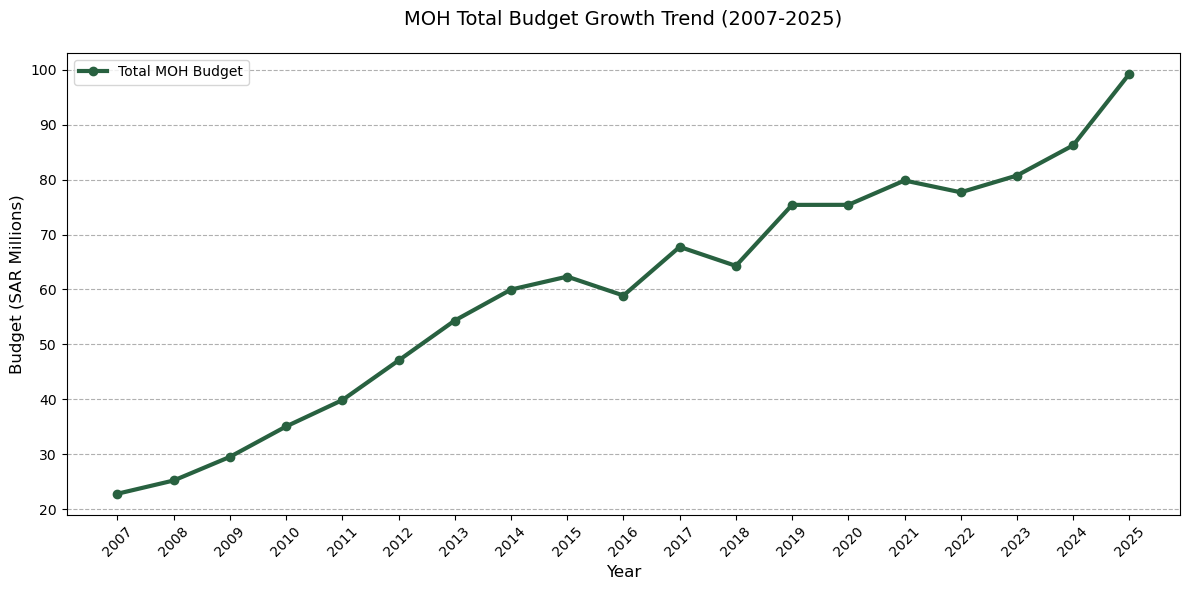

Time Series Line Chart successfully generated.


In [8]:
YEAR_COL = 'Gregorian_year' 
BUDGET_COL_CLEAN = "Total_budget"


df[YEAR_COL] = pd.to_numeric(df[YEAR_COL], errors='coerce')
df = df.dropna(subset=[YEAR_COL])
df[YEAR_COL] = df[YEAR_COL].astype(int)
df = df.sort_values(YEAR_COL)

plt.figure(figsize=(12, 6))


plt.plot(df[YEAR_COL], df[BUDGET_COL_CLEAN] / 1_000_000, 
         label='Total MOH Budget', marker='o', color='#286140', linewidth=3)

plt.title('MOH Total Budget Growth Trend (2007-2025)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Budget (SAR Millions)', fontsize=12)

plt.xticks(df[YEAR_COL], rotation=45) 
plt.ticklabel_format(style='plain', axis='y') 

plt.legend(loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print("Time Series Line Chart successfully generated.")

In [13]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'

def save_plot(filename):
    plt.tight_layout()
    plt.savefig(filename)
    print(f"   [Output] Chart saved as: {filename}")
    plt.close()

print(">>> STEP 4: ANALYZING MOH BUDGET HISTORY...")

df_budget = pd.read_excel('../../data/economic_burden/Ministry of Health Budget 2007 To 2025.xlsx')

df_budget = df_budget[['Gregorian_year', 'Total_budget']].copy()

df_budget = df_budget.dropna()

df_budget['Year'] = df_budget['Gregorian_year'].astype(int)
df_budget['Total_budget'] = df_budget['Total_budget'].astype(float)

df_budget['Budget_SAR'] = df_budget['Total_budget'] * 1000

df_budget['Budget_Billion'] = df_budget['Budget_SAR'] / 1_000_000_000

df_budget = df_budget.sort_values('Year')

print(f"   [Success] Loaded {len(df_budget)} years of budget data.")
print(f"   Last recorded budget ({df_budget['Year'].iloc[-1]}): {df_budget['Budget_Billion'].iloc[-1]:.2f} Billion SAR")



start_val = df_budget['Budget_Billion'].iloc[0]
end_val = df_budget['Budget_Billion'].iloc[-1]
years_count = df_budget['Year'].iloc[-1] - df_budget['Year'].iloc[0]

budget_cagr = (end_val / start_val)**(1/years_count) - 1


years_to_2030 = 2030 - df_budget['Year'].iloc[-1]
projected_budget_2030 = end_val * ((1 + budget_cagr) ** years_to_2030)


ncd_cost_2030 = 32.4 * 3.75

share_percentage = (ncd_cost_2030 / projected_budget_2030) * 100

print(f"   -> Historical Budget Growth (CAGR): {budget_cagr:.2%}")
print(f"   -> Projected 2030 Budget: {projected_budget_2030:.2f} Billion SAR")
print(f"   -> NCD Burden 2030: {ncd_cost_2030:.2f} Billion SAR")
print(f"   -> Warning: NCDs could consume {share_percentage:.1f}% of the Ministry's budget.")




fig4, ax4 = plt.subplots(figsize=(12, 6))

sns.lineplot(data=df_budget, x='Year', y='Budget_Billion', 
             marker='o', linewidth=3, color='#286140', label='Historical MoH Budget', ax=ax4)

x_proj = [df_budget['Year'].iloc[-1], 2030]
y_proj = [end_val, projected_budget_2030]
ax4.plot(x_proj, y_proj, linestyle='--', color='#286140', linewidth=2, label='Projected Budget Growth')
ax4.plot(2030, projected_budget_2030, marker='X', markersize=10, color='#286140')

ncd_x = [2020, 2030]
ncd_y = [19.8 * 3.75, 32.4 * 3.75]
ax4.plot(ncd_x, ncd_y, color='#912f46', linewidth=3, marker='D', label='NCD Cost Burden')

budget_2020_est = np.interp(2020, df_budget['Year'], df_budget['Budget_Billion'])

ax4.fill_between([2020, 2030], ncd_y, [budget_2020_est, projected_budget_2030], 
                 color='#912f46', alpha=0.1)

ax4.set_title('The Sustainability Challenge (Budget vs. Disease Cost)', fontsize=14, fontweight='bold', pad=20)
ax4.set_ylabel('Billions (SAR)')
ax4.set_xlabel('Year')
ax4.legend(loc='upper left')
ax4.set_ylim(0, 180) 




fig4.show()
save_plot('Budget_Sustainability.png')

>>> STEP 4: ANALYZING MOH BUDGET HISTORY...
   [Success] Loaded 19 years of budget data.
   Last recorded budget (2025): 99.28 Billion SAR
   -> Historical Budget Growth (CAGR): 8.51%
   -> Projected 2030 Budget: 149.38 Billion SAR
   -> NCD Burden 2030: 121.50 Billion SAR
   -> Warning: NCDs could consume 81.3% of the Ministry's budget.


C:\Users\DSC-GDP075\AppData\Local\Temp\ipykernel_2340\723789598.py:84: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig4.show()


   [Output] Chart saved as: Budget_Sustainability.png
